# Understanding the data and the data layout

In [1]:
import os
from os import listdir

In [2]:
base_path = "../input/plantvillage/PlantVillage/"

In [3]:
os.listdir(base_path)

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [4]:
len(os.listdir(base_path))

15

In [5]:
from glob import glob
imagePatches = glob("../input/plantvillage/PlantVillage/*/*.*", recursive=True)

In [6]:
len(imagePatches)

20638

In [7]:
imagePatches[0:10]

['../input/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/0f72db9c-d635-4415-9781-68937328aed2___NREC_B.Spot 9188.JPG',
 '../input/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/1b8d3e98-43d9-441d-93ef-a359e6e9ddc2___NREC_B.Spot 9052.JPG',
 '../input/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/b6d35d21-4812-4e32-ab9a-b6ddda8cbb79___JR_B.Spot 8972.JPG',
 '../input/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/e4e7e5a2-5aa1-4378-833d-9142358c7c9b___JR_B.Spot 9092.JPG',
 '../input/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/8b50f2db-cbf2-4758-bea6-a011f0cc1497___JR_B.Spot 3235.JPG',
 '../input/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/729b55d7-2a99-4861-910d-3b4e2bbce13a___JR_B.Spot 9036.JPG',
 '../input/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/4614ed01-e120-4ae9-8f13-028fa8297873___JR_B.Spot 8985.JPG',
 '../input/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/b143a281-5395-4a2a-8308-f6b23a476505___J

In [8]:
image_path = "../input/plantvillage/PlantVillage/Tomato_Bacterial_spot/3a5a5fef-8a3a-4f70-ab85-eaf5e3ecf6f2___GCREC_Bact.Sp 3449.JPG'"

In [9]:
dir_name = os.path.dirname(image_path)

In [10]:
len(dir_name.split("/"))

5

In [11]:
dir_name.split("/")[4]

'Tomato_Bacterial_spot'

# Image Processing using fastai

In [12]:
from fastai import *
from fastai.vision import *

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

from math import floor

In [13]:
path = Path(base_path)

In [14]:
path

PosixPath('../input/plantvillage/PlantVillage')

In [15]:
directory_root = '../input/plantvillage/'

In [16]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(image_directory)
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Image loading completed


In [17]:
image_list[0:10]

['../input/plantvillage//PlantVillage/Pepper__bell___Bacterial_spot/0f72db9c-d635-4415-9781-68937328aed2___NREC_B.Spot 9188.JPG',
 '../input/plantvillage//PlantVillage/Pepper__bell___Bacterial_spot/1b8d3e98-43d9-441d-93ef-a359e6e9ddc2___NREC_B.Spot 9052.JPG',
 '../input/plantvillage//PlantVillage/Pepper__bell___Bacterial_spot/b6d35d21-4812-4e32-ab9a-b6ddda8cbb79___JR_B.Spot 8972.JPG',
 '../input/plantvillage//PlantVillage/Pepper__bell___Bacterial_spot/e4e7e5a2-5aa1-4378-833d-9142358c7c9b___JR_B.Spot 9092.JPG',
 '../input/plantvillage//PlantVillage/Pepper__bell___Bacterial_spot/8b50f2db-cbf2-4758-bea6-a011f0cc1497___JR_B.Spot 3235.JPG',
 '../input/plantvillage//PlantVillage/Pepper__bell___Bacterial_spot/729b55d7-2a99-4861-910d-3b4e2bbce13a___JR_B.Spot 9036.JPG',
 '../input/plantvillage//PlantVillage/Pepper__bell___Bacterial_spot/4614ed01-e120-4ae9-8f13-028fa8297873___JR_B.Spot 8985.JPG',
 '../input/plantvillage//PlantVillage/Pepper__bell___Bacterial_spot/b143a281-5395-4a2a-8308-f6b23a47

In [18]:
tfms=get_transforms(flip_vert=True, max_warp=0., max_zoom=0., max_rotate=0.)

In [19]:
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)

In [20]:
data = ImageDataBunch.from_name_func(path, image_list, label_func=get_labels,  size=96, 
                                     bs=64,num_workers=2,ds_tfms=tfms
                                  ).normalize()

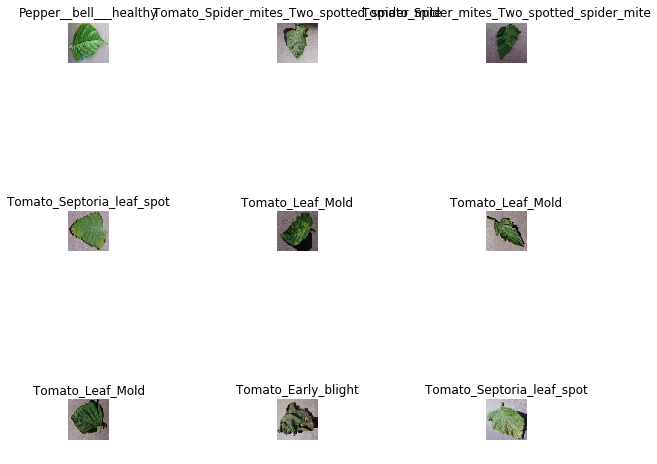

In [21]:
data.show_batch(rows=3, figsize=(8,8))

In [22]:
learner= cnn_learner(data, models.densenet121, metrics=[accuracy], model_dir='/tmp/models/')

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
32342954it [00:01, 20706251.94it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


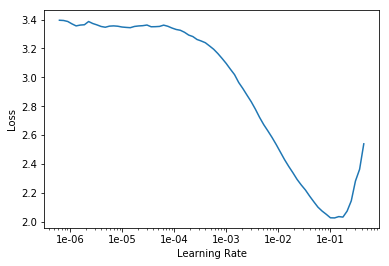

In [23]:
learner.lr_find()
learner.recorder.plot()

In [24]:
lr=1e-1
learner.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.427543,2.362881,0.435593,00:15


In [25]:
learner.save('model-1')

In [26]:
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


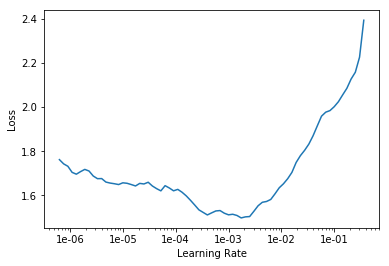

In [27]:
learner.lr_find()
learner.recorder.plot()

In [28]:
learner.fit_one_cycle(5,slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.481566,0.780863,0.749153,00:13
1,1.248102,0.592200,0.813559,00:13
2,1.027432,0.469825,0.847458,00:14
3,0.902719,0.454149,0.852542,00:14
4,0.817086,0.444281,0.855932,00:13


In [29]:
learner.save('model-2')
learner.load('model-2')

Learner(data=ImageDataBunch;

Train: LabelList (2362 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
Pepper__bell___Bacterial_spot,Pepper__bell___Bacterial_spot,Pepper__bell___Bacterial_spot,Pepper__bell___Bacterial_spot,Pepper__bell___Bacterial_spot
Path: ../input/plantvillage/PlantVillage;

Valid: LabelList (590 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
Tomato_Leaf_Mold,Tomato__Tomato_YellowLeaf__Curl_Virus,Tomato_Bacterial_spot,Tomato_Leaf_Mold,Pepper__bell___healthy
Path: ../input/plantvillage/PlantVillage;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_si

In [30]:
learner.fit_one_cycle(80,slice(3e-5,3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.705132,0.429467,0.866102,00:14
1,0.685362,0.425488,0.855932,00:13
2,0.675129,0.404622,0.864407,00:13
3,0.682141,0.398683,0.869492,00:14
4,0.652753,0.386802,0.876271,00:14
5,0.608646,0.350599,0.894915,00:14
6,0.598227,0.350113,0.884746,00:13
7,0.584840,0.397499,0.877966,00:14
8,0.548023,0.336989,0.886441,00:13
9,0.518749,0.366114,0.888136,00:13


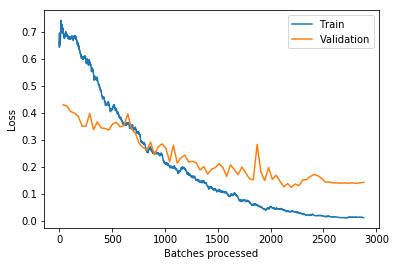

In [31]:
learner.recorder.plot_losses()

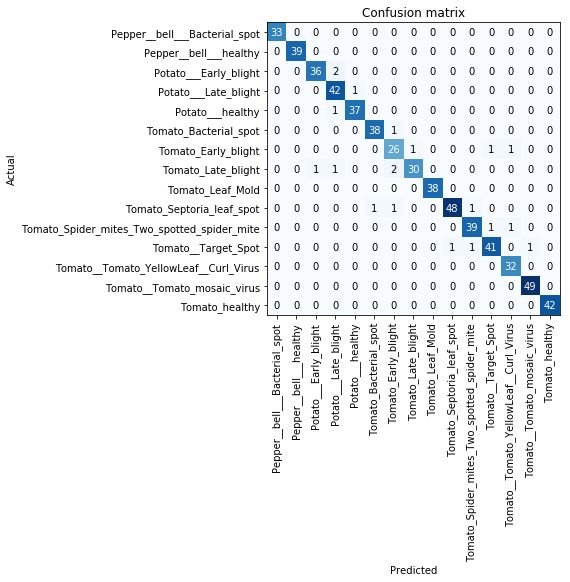

In [32]:
conf= ClassificationInterpretation.from_learner(learner)
conf.plot_confusion_matrix(figsize=(10,8))

In [33]:
predictions,labels = learner.get_preds(ds_type=DatasetType.Valid)

predictions = predictions.numpy()
labels = labels.numpy()

predicted_labels = np.argmax(predictions, axis = 1)
print((predicted_labels == labels ).sum().item()/ len(predicted_labels))

0.9661016949152542
